# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

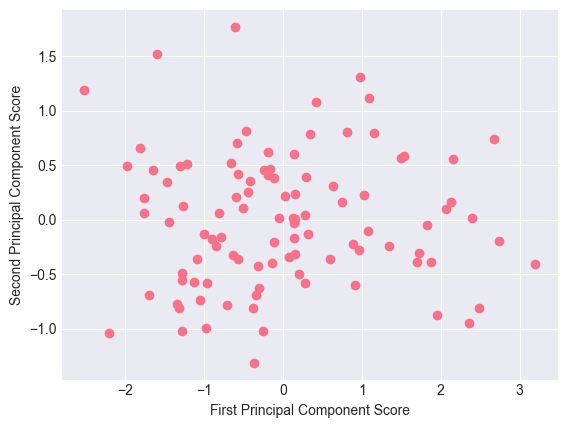

In [19]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

## What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score? What does that mean about their values in series_1, series_2, and series_3?

The three outliers in the upper left corner had their series_3 sharply decline, while series_1 and series_2 stayed normal. By looking at PC1, `[0.265, 0.301, 0.916]`, series_3 has a very high coefficient at `0.916` compared to the other two. Since PC1 is negative, this means that series_3 must be very negative. This is because `PC1 = 0.265×ser1 + 0.301×ser2 + 0.916×ser3`. Since all the coefficients are positive, the total can only be negative if series_3 is very negative due to how large it is compared to the other values. By looking at PC2, `[0.603, 0.689, -0.401]`, series_3 has a negative coefficient at `-0.401` compared to the other two. Since PC2 is positive, this means that series_3 is more negative compared to the other two. Essentially since PC2 is positive for the outliers, it means that the value of series_3 outweighs the combination of series_1 and series_2 to push it to be positive. The negative series_3 value actually adds to the positive PC2 score.

Using mock values we can see that below.
```
PC1 = 0.265×(0.55) + 0.301×(0.55) + 0.916×(-1.98) = -1.502
PC2 = 0.603×(0.55) + 0.689×(0.55) - 0.401×(-1.98) = 1.505
```

To summarize, PC1 had a low (negative) score since they are on the left. PC2 had a high (positive) score since they are on the top.

## It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

It's hard to distinguish series_1 and series_2 due to how the data was generated. Since series_2 is essentially series_1 with only 10% noise compared to series_3 having 50% noise, series_1 and series_2 are highly correlated. PC1 gives them similar weights with 0.265 and 0.301. PC2 gives them similar weights as well with 0.603 and 0.689. Additionally, looking at the explained variance ratio (`[0.79916477 0.18990532 0.01092991]`), series_3 only accounts for 1.1% of the total variance.

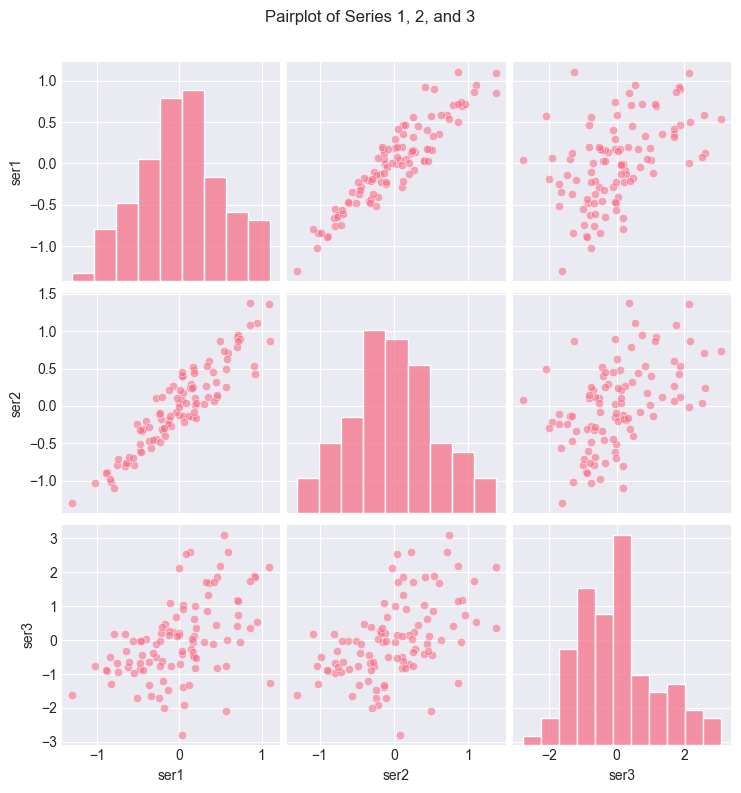

In [20]:
import seaborn as sns

g = sns.pairplot(df[['ser1', 'ser2', 'ser3']],
                 diag_kind='hist',
                 plot_kws={'alpha': 0.6})

g.fig.suptitle('Pairplot of Series 1, 2, and 3', y=1.05)
plt.show()

We can clearly see with the pairplot that series_1 and series_2 have a strong linear relationship. We can also see that series_1 and series_2 have a wider almost cloud like relationship with series_3. This is due to the 50% noise. You really cannot distinguish between series_1 and series_2 at all due to the fact there's only 10% noise.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

## 3.1 Kidney Disease Datasets

Below are analysis on the three kidney disease datasets:
1. Chronic Kidney Disease (CKD)
2. Diabetic Nephropathy
3. Acute Kidney Injury (AKI)

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

ckd_df = pd.read_csv('../../datasets/chronic_kidney_disease.csv')
dn_df = pd.read_csv('../../datasets/diabetic_nephropathy.csv')
aki_df = pd.read_csv('../../datasets/acute_kidney_injury.csv')

print("Datasets loaded successfully!")
print(f"CKD dataset shape: {ckd_df.shape}")
print(f"Diabetic Nephropathy dataset shape: {dn_df.shape}")
print(f"Acute Kidney Injury dataset shape: {aki_df.shape}")

Datasets loaded successfully!
CKD dataset shape: (202, 29)
Diabetic Nephropathy dataset shape: (767, 22)
Acute Kidney Injury dataset shape: (4001, 57)


## Part 1: Chronic Kidney Disease (CKD) Analysis

In [22]:
ckd_df_clean = ckd_df.iloc[2:].copy()

column_mapping = {
    'age': 'age',
    'bp (Diastolic)': 'diastolic_bp',
    'bp limit': 'bp_limit',
    'sg': 'specific_gravity',
    'al': 'albumin',
    'su': 'sugar',
    'rbc': 'red_blood_cells',
    'pc': 'pus_cell',
    'pcc': 'pus_cell_clumps',
    'ba': 'bacteria',
    'bgr': 'blood_glucose_random',
    'bu': 'blood_urea',
    'sc': 'serum_creatinine',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'hemoglobin',
    'pcv': 'packed_cell_volume',
    'wbcc': 'white_blood_cell_count',
    'rbcc': 'red_blood_cell_count',
    'htn': 'hypertension',
    'dm': 'diabetes_mellitus',
    'cad': 'coronary_artery_disease',
    'appet': 'appetite',
    'pe': 'pedal_edema',
    'ane': 'anemia',
    'grf': 'glomerular_filtration_rate',
    'stage': 'stage',
    'affected': 'affected',
    'class': 'class'
}

ckd_df_clean = ckd_df_clean.rename(columns=column_mapping)

def extract_numeric_from_range(val):
    if pd.isna(val):
        return np.nan
    val_str = str(val)
    if '<' in val_str:
        return float(val_str.replace('<', '').strip()) * 0.9
    elif '≥' in val_str:
        return float(val_str.replace('≥', '').strip()) * 1.1
    elif '-' in val_str:
        parts = val_str.split('-')
        if len(parts) == 2:
            try:
                return (float(parts[0].strip()) + float(parts[1].strip())) / 2
            except:
                return np.nan
    else:
        try:
            return float(val_str)
        except:
            return np.nan

range_columns = ['age', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random',
                 'blood_urea', 'sodium', 'serum_creatinine', 'potassium', 'hemoglobin',
                 'packed_cell_volume', 'red_blood_cell_count', 'white_blood_cell_count',
                 'glomerular_filtration_rate']

for col in range_columns:
    if col in ckd_df_clean.columns:
        ckd_df_clean[f'{col}_numeric'] = ckd_df_clean[col].apply(extract_numeric_from_range)

### 1.1 Heatmaps for CKD Dataset

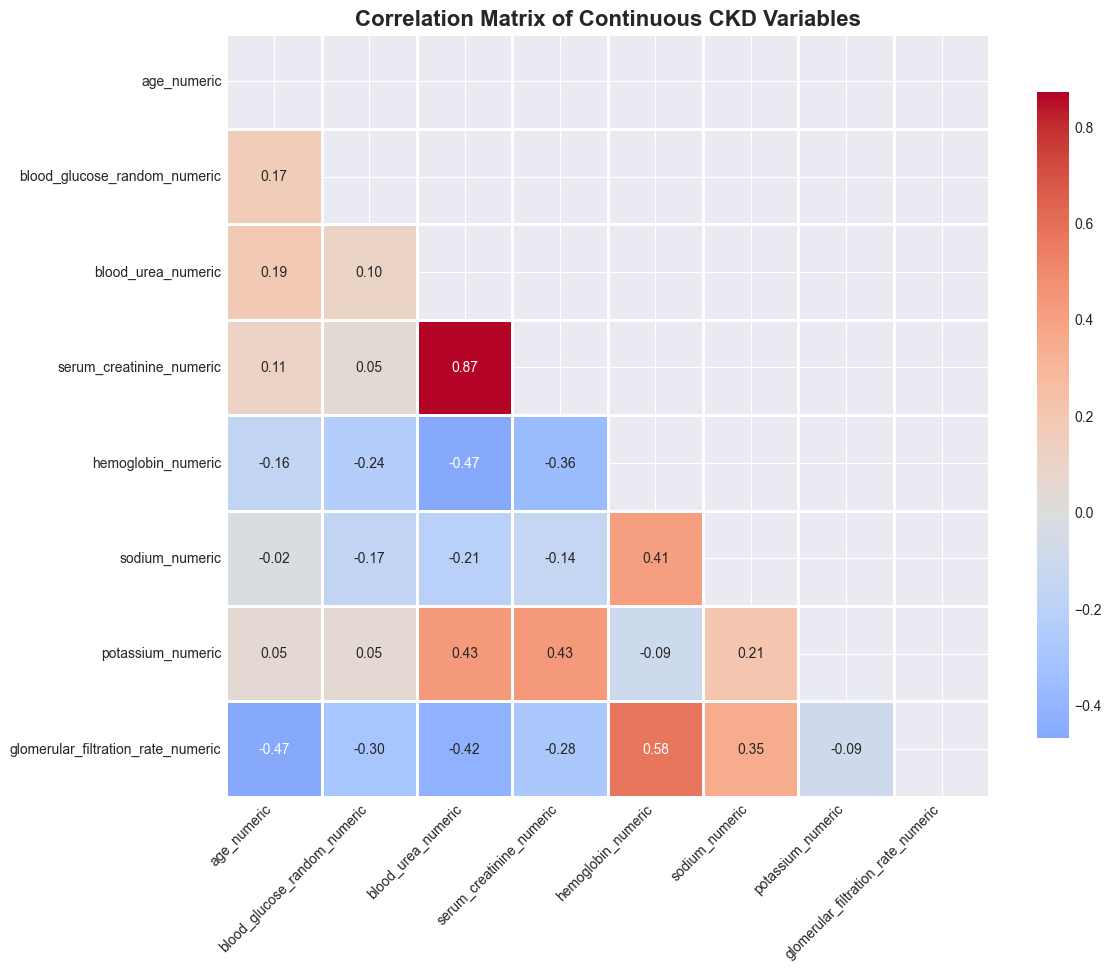

In [23]:
continuous_vars = ['age_numeric', 'blood_glucose_random_numeric', 'blood_urea_numeric',
                   'serum_creatinine_numeric', 'hemoglobin_numeric', 'sodium_numeric',
                   'potassium_numeric', 'glomerular_filtration_rate_numeric']

existing_continuous_vars = [col for col in continuous_vars if col in ckd_df_clean.columns]

plt.figure(figsize=(12, 10))
correlation_matrix = ckd_df_clean[existing_continuous_vars].corr()

# add mask to remove redundant cells
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": .8})

plt.title('Correlation Matrix of Continuous CKD Variables', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 1.2 Bubble Plots for CKD Dataset

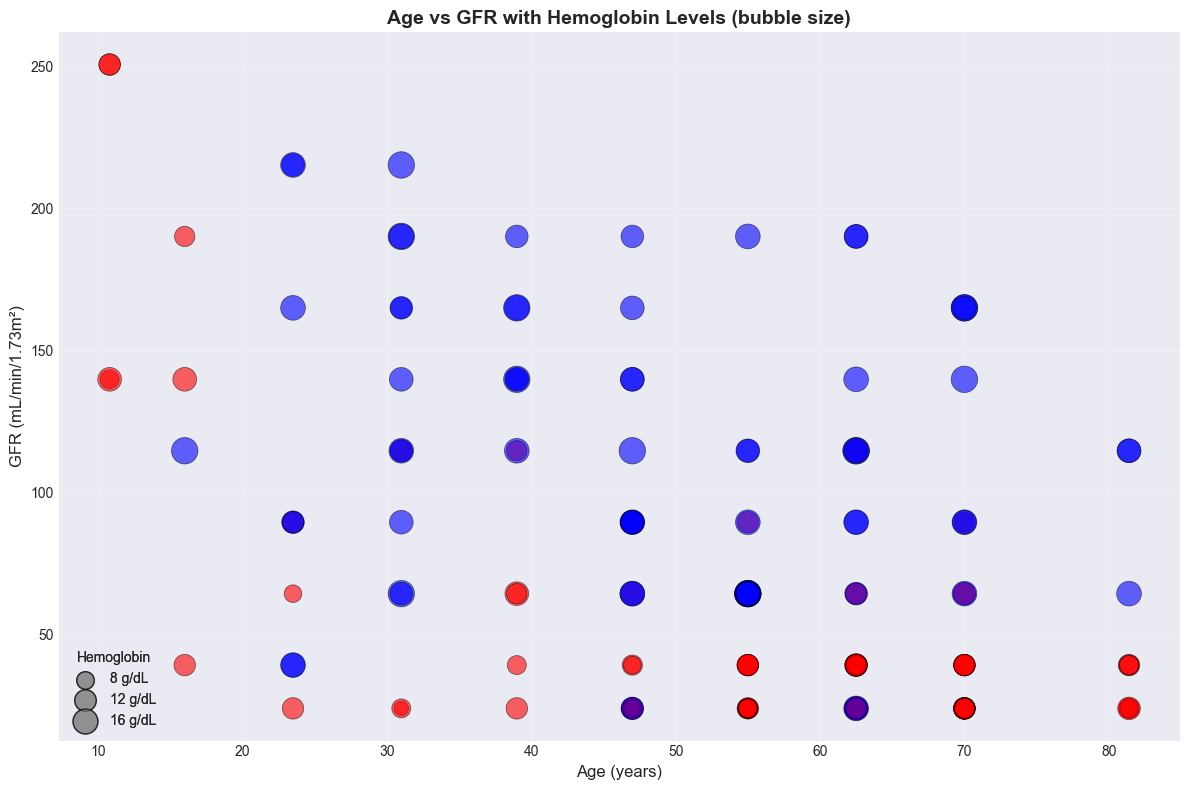

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))

bubble_data = ckd_df_clean[['age_numeric', 'glomerular_filtration_rate_numeric', 
                            'hemoglobin_numeric', 'class']].dropna()

ckd_data = bubble_data[bubble_data['class'] == 'ckd']
notckd_data = bubble_data[bubble_data['class'] == 'notckd']

scatter1 = ax.scatter(ckd_data['age_numeric'], 
                     ckd_data['glomerular_filtration_rate_numeric'],
                     s=ckd_data['hemoglobin_numeric'] * 20,
                     alpha=0.6,
                     c='red',
                     edgecolors='black',
                     linewidth=0.5,
                     label='CKD')

scatter2 = ax.scatter(notckd_data['age_numeric'], 
                     notckd_data['glomerular_filtration_rate_numeric'],
                     s=notckd_data['hemoglobin_numeric'] * 20,
                     alpha=0.6,
                     c='blue',
                     edgecolors='black',
                     linewidth=0.5,
                     label='Not CKD')

ax.set_xlabel('Age (years)', fontsize=12)
ax.set_ylabel('GFR (mL/min/1.73m²)', fontsize=12)
ax.set_title('Age vs GFR with Hemoglobin Levels (bubble size)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

sizes = [8, 12, 16]
labels = ['8 g/dL', '12 g/dL', '16 g/dL']
legend_bubbles = []
for size, label in zip(sizes, labels):
    legend_bubbles.append(plt.scatter([], [], s=size*20, c='gray', alpha=0.6, edgecolors='black'))
legend2 = plt.legend(legend_bubbles, labels, scatterpoints=1, title='Hemoglobin', 
                    loc='lower left', bbox_to_anchor=(0, 0))
plt.gca().add_artist(ax.get_legend())

plt.tight_layout()
plt.show()

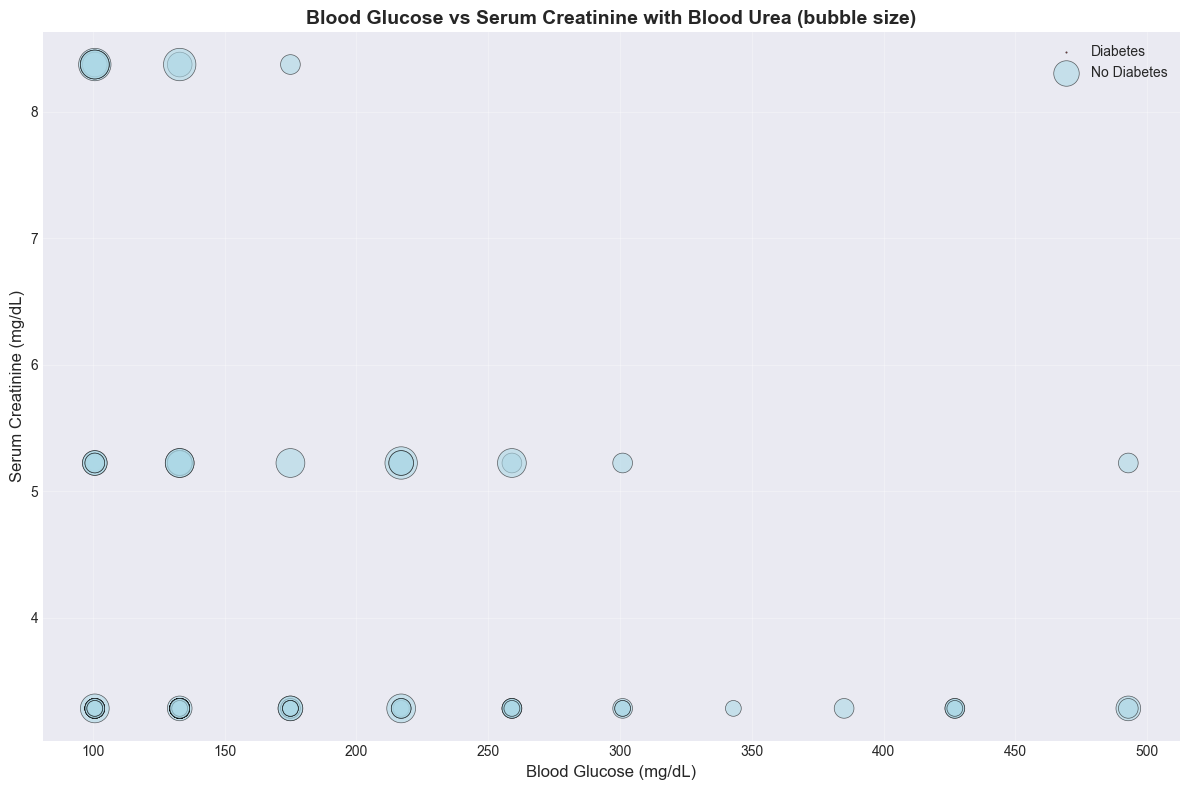

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))

bubble_data2 = ckd_df_clean[['blood_glucose_random_numeric', 'serum_creatinine_numeric', 
                             'blood_urea_numeric', 'diabetes_mellitus']].dropna()

bubble_data2 = bubble_data2[bubble_data2['serum_creatinine_numeric'] < 10]
bubble_data2 = bubble_data2[bubble_data2['blood_urea_numeric'] < 200]

bubble_data2['diabetes_binary'] = (bubble_data2['diabetes_mellitus'] == 'yes').astype(int)

diabetes_yes = bubble_data2[bubble_data2['diabetes_binary'] == 1]
diabetes_no = bubble_data2[bubble_data2['diabetes_binary'] == 0]

scatter1 = ax.scatter(diabetes_yes['blood_glucose_random_numeric'], 
                     diabetes_yes['serum_creatinine_numeric'],
                     s=diabetes_yes['blood_urea_numeric'] * 3,
                     alpha=0.6,
                     c='darkred',
                     edgecolors='black',
                     linewidth=0.5,
                     label='Diabetes')

scatter2 = ax.scatter(diabetes_no['blood_glucose_random_numeric'], 
                     diabetes_no['serum_creatinine_numeric'],
                     s=diabetes_no['blood_urea_numeric'] * 3,
                     alpha=0.6,
                     c='lightblue',
                     edgecolors='black',
                     linewidth=0.5,
                     label='No Diabetes')

ax.set_xlabel('Blood Glucose (mg/dL)', fontsize=12)
ax.set_ylabel('Serum Creatinine (mg/dL)', fontsize=12)
ax.set_title('Blood Glucose vs Serum Creatinine with Blood Urea (bubble size)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 1.3 Principal Component Analysis (PCA) for CKD Dataset

In [26]:
continuous_features = ['age_numeric', 'blood_glucose_random_numeric', 'blood_urea_numeric',
                      'serum_creatinine_numeric', 'hemoglobin_numeric', 'sodium_numeric',
                      'potassium_numeric', 'glomerular_filtration_rate_numeric']

pca_data = ckd_df_clean[continuous_features + ['class']].dropna()

X = pca_data[continuous_features]
y_class = pca_data['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio by component (continuous variables only):")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")

cumsum_var = np.cumsum(pca.explained_variance_ratio_)
print(f"\nCumulative variance explained by first 3 components: {cumsum_var[2]:.4f} ({cumsum_var[2]*100:.2f}%)")
print(f"Cumulative variance explained by first 2 components: {cumsum_var[1]:.4f} ({cumsum_var[1]*100:.2f}%)")

Explained variance ratio by component (continuous variables only):
PC1: 0.3725 (37.25%)
PC2: 0.1980 (19.80%)
PC3: 0.1379 (13.79%)
PC4: 0.1068 (10.68%)
PC5: 0.0702 (7.02%)
PC6: 0.0593 (5.93%)
PC7: 0.0410 (4.10%)
PC8: 0.0144 (1.44%)

Cumulative variance explained by first 3 components: 0.7084 (70.84%)
Cumulative variance explained by first 2 components: 0.5705 (57.05%)


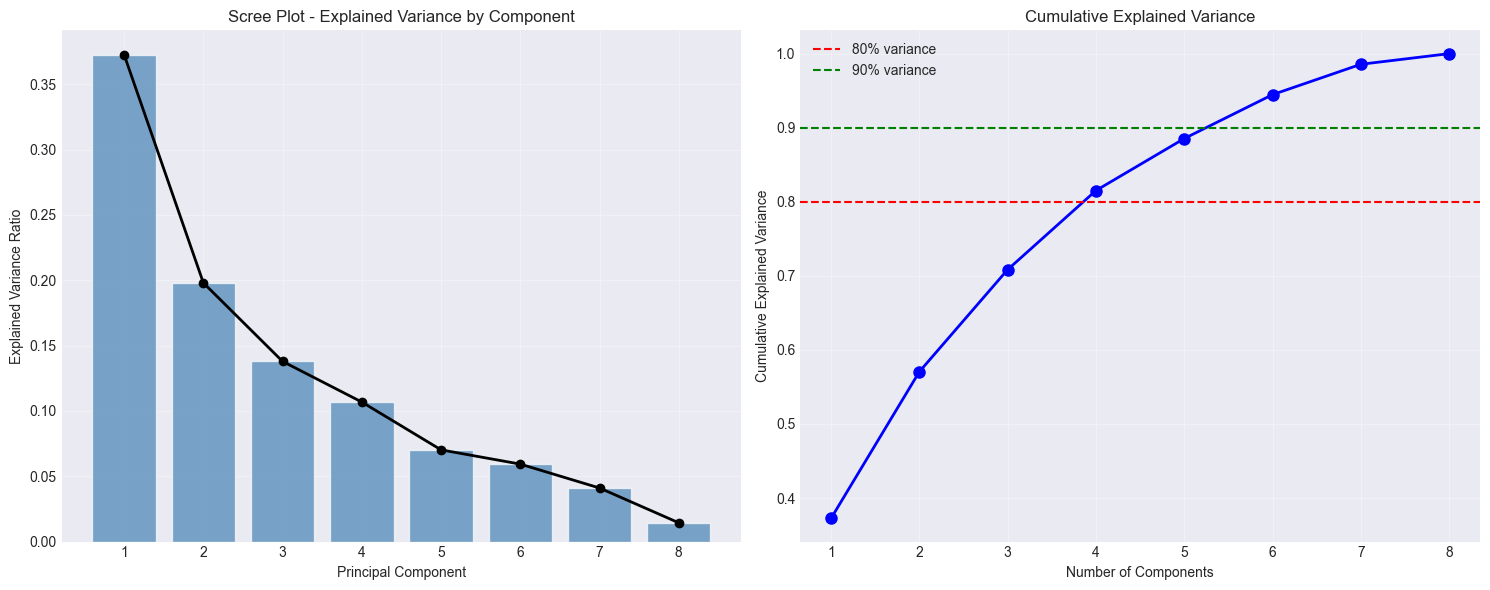

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.bar(range(1, len(pca.explained_variance_ratio_) + 1), 
        pca.explained_variance_ratio_,
        alpha=0.7,
        color='steelblue')
ax1.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_,
         'ko-',
         linewidth=2)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Scree Plot - Explained Variance by Component')
ax1.set_xticks(range(1, len(pca.explained_variance_ratio_) + 1))
ax1.grid(True, alpha=0.3)

ax2.plot(range(1, len(cumsum_var) + 1), 
         cumsum_var,
         'bo-',
         linewidth=2,
         markersize=8)
ax2.axhline(y=0.8, color='r', linestyle='--', label='80% variance')
ax2.axhline(y=0.9, color='g', linestyle='--', label='90% variance')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance')
ax2.set_xticks(range(1, len(cumsum_var) + 1))
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

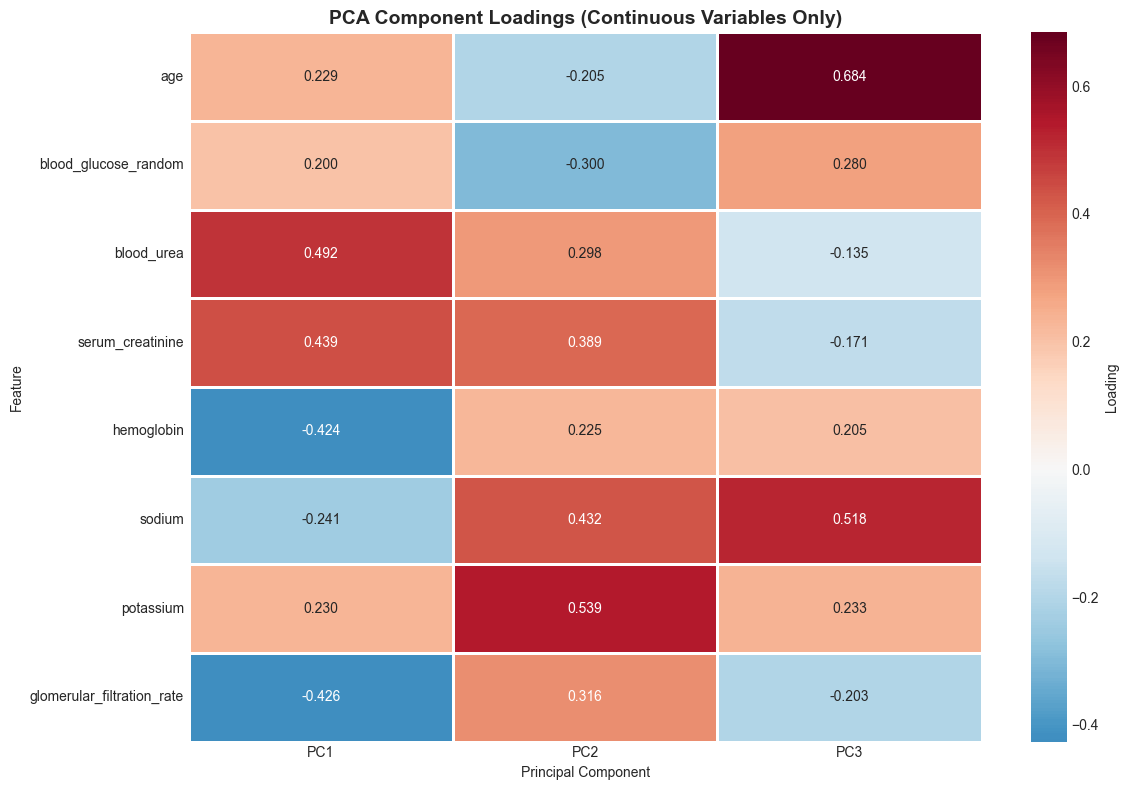


PCA Interpretation:
PC1 appears to capture: blood_urea, serum_creatinine, glomerular_filtration_rate
PC2 appears to capture: potassium, sodium, serum_creatinine
PC3 appears to capture: age, sodium, blood_glucose_random


Relationship between Principal Components and CKD Status:
------------------------------------------------------------
CKD patients average PC1 score: 0.854
Non-CKD patients average PC1 score: -1.506

CKD status appears to be strongly related to PC1, which is dominated by
kidney function markers (blood urea, serum creatinine, GFR).


In [28]:
plt.figure(figsize=(12, 8))

loadings = pd.DataFrame(
    pca.components_[:3].T,
    columns=['PC1', 'PC2', 'PC3'],
    index=[feat.replace('_numeric', '') for feat in continuous_features]
)

sns.heatmap(loadings, 
            annot=True, 
            fmt='.3f',
            cmap='RdBu_r',
            center=0,
            cbar_kws={'label': 'Loading'},
            linewidths=1)

plt.title('PCA Component Loadings (Continuous Variables Only)', fontsize=14, fontweight='bold')
plt.xlabel('Principal Component')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nPCA Interpretation:")
print("PC1 appears to capture:", end=" ")
top_pc1 = loadings['PC1'].abs().nlargest(3).index.tolist()
print(", ".join(top_pc1))

print("PC2 appears to capture:", end=" ")
top_pc2 = loadings['PC2'].abs().nlargest(3).index.tolist()
print(", ".join(top_pc2))

print("PC3 appears to capture:", end=" ")
top_pc3 = loadings['PC3'].abs().nlargest(3).index.tolist()
print(", ".join(top_pc3))

print("\n\nRelationship between Principal Components and CKD Status:")
print("-" * 60)

ckd_pc1_mean = X_pca[y_class == 'ckd', 0].mean()
notckd_pc1_mean = X_pca[y_class == 'notckd', 0].mean()
print(f"CKD patients average PC1 score: {ckd_pc1_mean:.3f}")
print(f"Non-CKD patients average PC1 score: {notckd_pc1_mean:.3f}")

print(f"\nCKD status appears to be strongly related to PC1, which is dominated by")
print(f"kidney function markers (blood urea, serum creatinine, GFR).")

### 1.4 Linear Regression Analysis for CKD Dataset

In [29]:
regression_data = ckd_df_clean.copy()

continuous_predictors = ['age_numeric', 'blood_glucose_random_numeric', 'blood_urea_numeric',
                        'serum_creatinine_numeric', 'hemoglobin_numeric', 'sodium_numeric', 
                        'potassium_numeric']
target = 'glomerular_filtration_rate_numeric'

model1_data = regression_data[continuous_predictors + [target]].dropna()
X1 = model1_data[continuous_predictors]
y1 = model1_data[target]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

model1 = LinearRegression()
model1.fit(X1_train, y1_train)

y1_pred_train = model1.predict(X1_train)
y1_pred_test = model1.predict(X1_test)

r2_train1 = r2_score(y1_train, y1_pred_train)
r2_test1 = r2_score(y1_test, y1_pred_test)
mse_test1 = mean_squared_error(y1_test, y1_pred_test)

print("Model 1: Predicting GFR from Continuous Variables")
print(f"Features: {[feat.replace('_numeric', '') for feat in continuous_predictors]}")
print(f"R² (train): {r2_train1:.4f}")
print(f"R² (test): {r2_test1:.4f}")
print(f"MSE (test): {mse_test1:.2f}")
print(f"RMSE (test): {np.sqrt(mse_test1):.2f}")
print(f"Correlation (test): {np.corrcoef(y1_test, y1_pred_test)[0,1]:.4f}")

print("\nFeature Coefficients:")
for feat, coef in zip(continuous_predictors, model1.coef_):
    print(f"  {feat.replace('_numeric', '')}: {coef:.4f}")

Model 1: Predicting GFR from Continuous Variables
Features: ['age', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'hemoglobin', 'sodium', 'potassium']
R² (train): 0.5294
R² (test): 0.3739
MSE (test): 1975.99
RMSE (test): 44.45
Correlation (test): 0.6746

Feature Coefficients:
  age: -1.2137
  blood_glucose_random: -0.0931
  blood_urea: -0.4374
  serum_creatinine: 6.7190
  hemoglobin: 6.5094
  sodium: 1.3181
  potassium: -3.3345


In [30]:
continuous_predictors_2 = ['age_numeric', 'blood_glucose_random_numeric', 'blood_urea_numeric',
                          'hemoglobin_numeric', 'sodium_numeric', 'potassium_numeric',
                          'glomerular_filtration_rate_numeric']
target2 = 'serum_creatinine_numeric'

model2_data = regression_data[continuous_predictors_2 + [target2]].dropna()
X2 = model2_data[continuous_predictors_2]
y2 = model2_data[target2]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)

y2_pred_train = model2.predict(X2_train)
y2_pred_test = model2.predict(X2_test)

r2_train2 = r2_score(y2_train, y2_pred_train)
r2_test2 = r2_score(y2_test, y2_pred_test)
mse_test2 = mean_squared_error(y2_test, y2_pred_test)

print("\nModel 2: Predicting Serum Creatinine from Continuous Variables")
print(f"Features: {[feat.replace('_numeric', '') for feat in continuous_predictors_2]}")
print(f"R² (train): {r2_train2:.4f}")
print(f"R² (test): {r2_test2:.4f}")
print(f"MSE (test): {mse_test2:.4f}")
print(f"RMSE (test): {np.sqrt(mse_test2):.4f}")
print(f"Correlation (test): {np.corrcoef(y2_test, y2_pred_test)[0,1]:.4f}")

print("\nFeature Coefficients:")
for feat, coef in zip(continuous_predictors_2, model2.coef_):
    print(f"  {feat.replace('_numeric', '')}: {coef:.4f}")


Model 2: Predicting Serum Creatinine from Continuous Variables
Features: ['age', 'blood_glucose_random', 'blood_urea', 'hemoglobin', 'sodium', 'potassium', 'glomerular_filtration_rate']
R² (train): 0.8851
R² (test): -0.7062
MSE (test): 11.5552
RMSE (test): 3.3993
Correlation (test): 0.4813

Feature Coefficients:
  age: 0.0027
  blood_glucose_random: 0.0008
  blood_urea: 0.0428
  hemoglobin: 0.0083
  sodium: -0.0806
  potassium: 0.5054
  glomerular_filtration_rate: 0.0060


In [31]:
continuous_predictors_3 = ['age_numeric', 'blood_glucose_random_numeric', 'blood_urea_numeric',
                          'serum_creatinine_numeric', 'sodium_numeric', 'potassium_numeric',
                          'glomerular_filtration_rate_numeric']
target3 = 'hemoglobin_numeric'

model3_data = regression_data[continuous_predictors_3 + [target3]].dropna()
X3 = model3_data[continuous_predictors_3]
y3 = model3_data[target3]

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

model3 = LinearRegression()
model3.fit(X3_train, y3_train)

y3_pred_train = model3.predict(X3_train)
y3_pred_test = model3.predict(X3_test)

r2_train3 = r2_score(y3_train, y3_pred_train)
r2_test3 = r2_score(y3_test, y3_pred_test)
mse_test3 = mean_squared_error(y3_test, y3_pred_test)

print("\nModel 3: Predicting Hemoglobin from Continuous Variables")
print(f"Features: {[feat.replace('_numeric', '') for feat in continuous_predictors_3]}")
print(f"R² (train): {r2_train3:.4f}")
print(f"R² (test): {r2_test3:.4f}")
print(f"MSE (test): {mse_test3:.4f}")
print(f"RMSE (test): {np.sqrt(mse_test3):.4f}")
print(f"Correlation (test): {np.corrcoef(y3_test, y3_pred_test)[0,1]:.4f}")

print("\nFeature Coefficients:")
for feat, coef in zip(continuous_predictors_3, model3.coef_):
    print(f"  {feat.replace('_numeric', '')}: {coef:.4f}")


Model 3: Predicting Hemoglobin from Continuous Variables
Features: ['age', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'glomerular_filtration_rate']
R² (train): 0.4305
R² (test): 0.4463
MSE (test): 5.7217
RMSE (test): 2.3920
Correlation (test): 0.6787

Feature Coefficients:
  age: 0.0167
  blood_glucose_random: -0.0035
  blood_urea: -0.0178
  serum_creatinine: 0.0303
  sodium: 0.0699
  potassium: 0.0767
  glomerular_filtration_rate: 0.0212


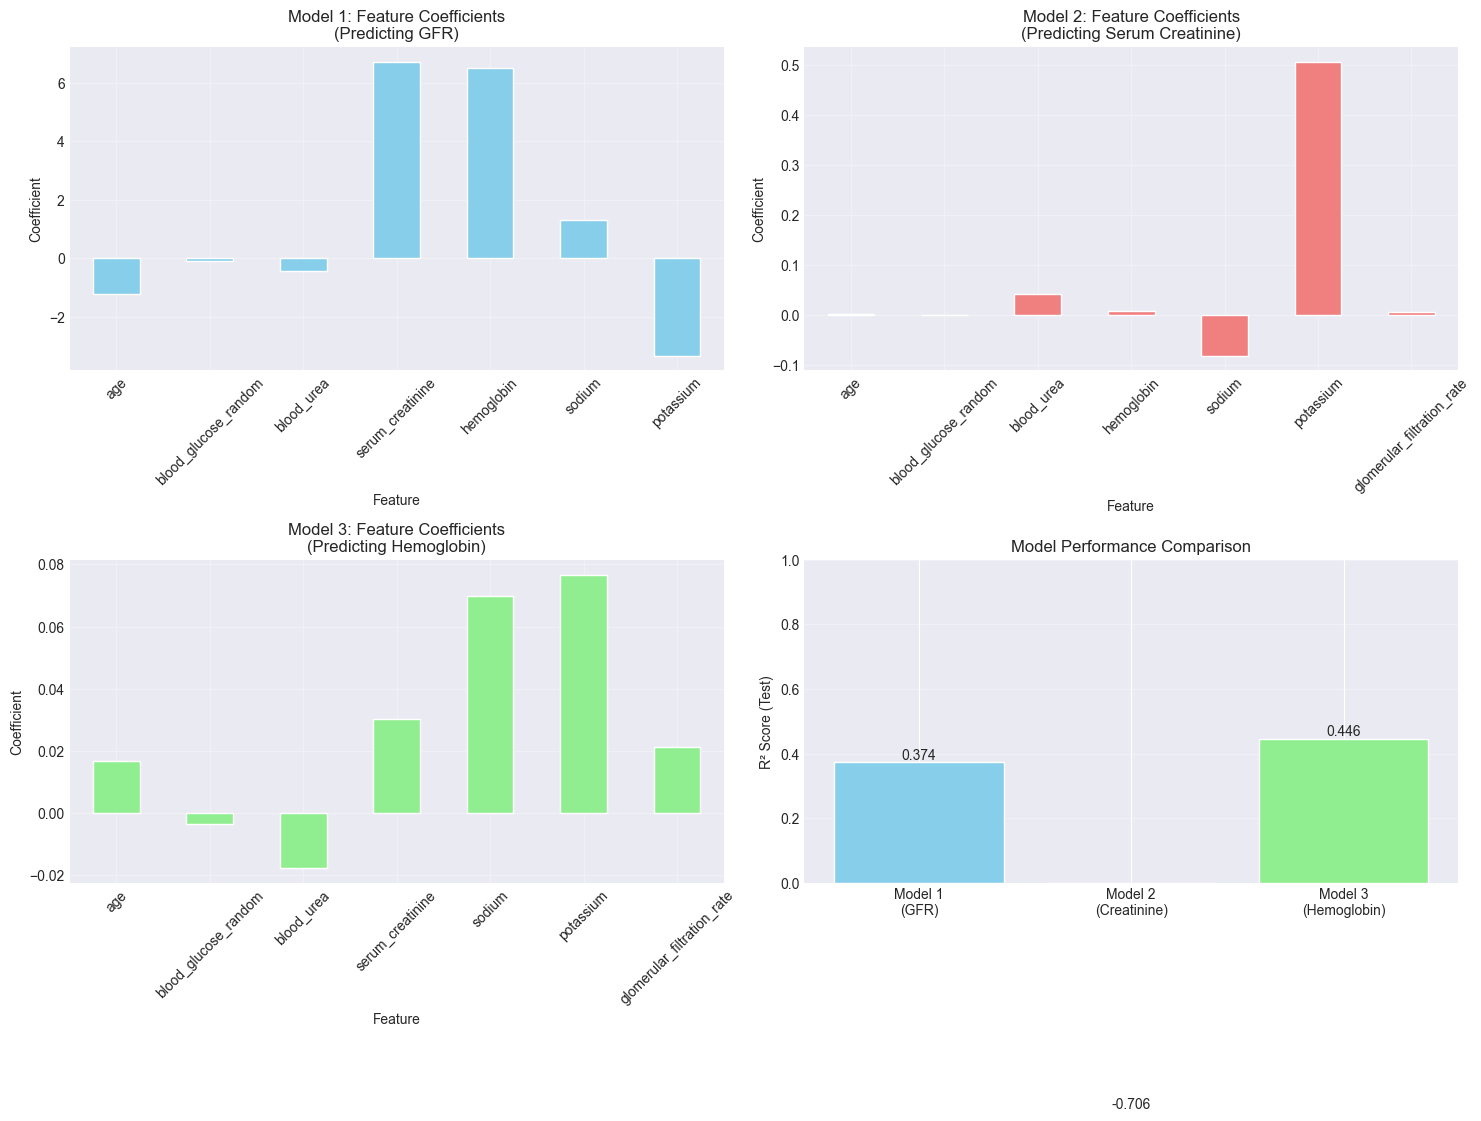


Linear Regression Model Comparison Summary (Continuous Variables Only)
Model                               R² (test)       RMSE (test)    
------------------------------------------------------------
Model 1 (GFR prediction)            0.3739          44.45          
Model 2 (Creatinine prediction)     -0.7062         3.3993         
Model 3 (Hemoglobin prediction)     0.4463          2.3920         


In [32]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

ax1 = axes[0, 0]
coef1 = pd.Series(model1.coef_, index=[feat.replace('_numeric', '') for feat in continuous_predictors])
coef1.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Model 1: Feature Coefficients\n(Predicting GFR)')
ax1.set_xlabel('Feature')
ax1.set_ylabel('Coefficient')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

ax2 = axes[0, 1]
coef2 = pd.Series(model2.coef_, index=[feat.replace('_numeric', '') for feat in continuous_predictors_2])
coef2.plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Model 2: Feature Coefficients\n(Predicting Serum Creatinine)')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Coefficient')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

ax3 = axes[1, 0]
coef3 = pd.Series(model3.coef_, index=[feat.replace('_numeric', '') for feat in continuous_predictors_3])
coef3.plot(kind='bar', ax=ax3, color='lightgreen')
ax3.set_title('Model 3: Feature Coefficients\n(Predicting Hemoglobin)')
ax3.set_xlabel('Feature')
ax3.set_ylabel('Coefficient')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3)

ax4 = axes[1, 1]
models = ['Model 1\n(GFR)', 'Model 2\n(Creatinine)', 'Model 3\n(Hemoglobin)']
r2_scores = [r2_test1, r2_test2, r2_test3]
bars = ax4.bar(models, r2_scores, color=['skyblue', 'lightcoral', 'lightgreen'])
ax4.set_ylabel('R² Score (Test)')
ax4.set_title('Model Performance Comparison')
ax4.set_ylim(0, 1)
ax4.grid(True, alpha=0.3, axis='y')

for bar, score in zip(bars, r2_scores):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{score:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Linear Regression Model Comparison Summary (Continuous Variables Only)")
print("="*60)
print(f"{'Model':<35} {'R² (test)':<15} {'RMSE (test)':<15}")
print("-"*60)
print(f"{'Model 1 (GFR prediction)':<35} {r2_test1:<15.4f} {np.sqrt(mse_test1):<15.2f}")
print(f"{'Model 2 (Creatinine prediction)':<35} {r2_test2:<15.4f} {np.sqrt(mse_test2):<15.4f}")
print(f"{'Model 3 (Hemoglobin prediction)':<35} {r2_test3:<15.4f} {np.sqrt(mse_test3):<15.4f}")
print("="*60)

## Part 2: Diabetic Nephropathy Analysis

### 2.1 Heatmaps for Diabetic Nephropathy Dataset

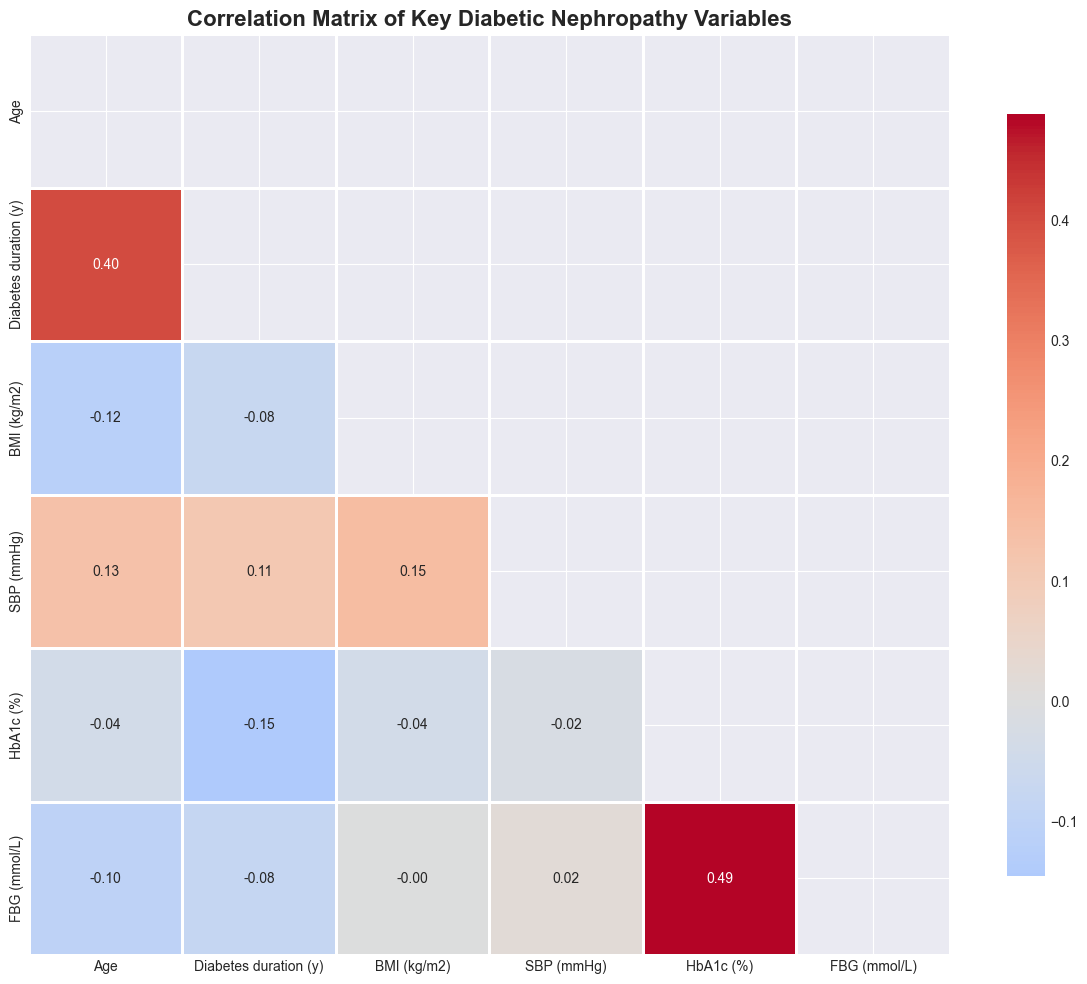

In [34]:
dn_df.columns = dn_df.columns.str.strip()

key_dn_vars = ['Age', 'Diabetes duration (y)', 'BMI (kg/m2)', 'SBP (mmHg)', 
               'HbA1c (%)', 'FBG (mmol/L)', 'Serum Creatinine(mg/dl)', 
               'eGFR(ml/min/1.73m2)']

existing_dn_vars = [col for col in key_dn_vars if col in dn_df.columns]

if 'Serum Creatinine(mg/dl)' not in dn_df.columns:
    creatinine_cols = [col for col in dn_df.columns if 'creatinine' in col.lower()]
    egfr_cols = [col for col in dn_df.columns if 'gfr' in col.lower() or 'egfr' in col.lower()]

    existing_dn_vars = ['Age', 'Diabetes duration (y)', 'BMI (kg/m2)', 'SBP (mmHg)', 
                        'HbA1c (%)', 'FBG (mmol/L)']
    existing_dn_vars = [col for col in existing_dn_vars if col in dn_df.columns]

plt.figure(figsize=(12, 10))
correlation_matrix_dn = dn_df[existing_dn_vars].corr()

mask = np.triu(np.ones_like(correlation_matrix_dn, dtype=bool))

sns.heatmap(correlation_matrix_dn, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": .8})

plt.title('Correlation Matrix of Key Diabetic Nephropathy Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

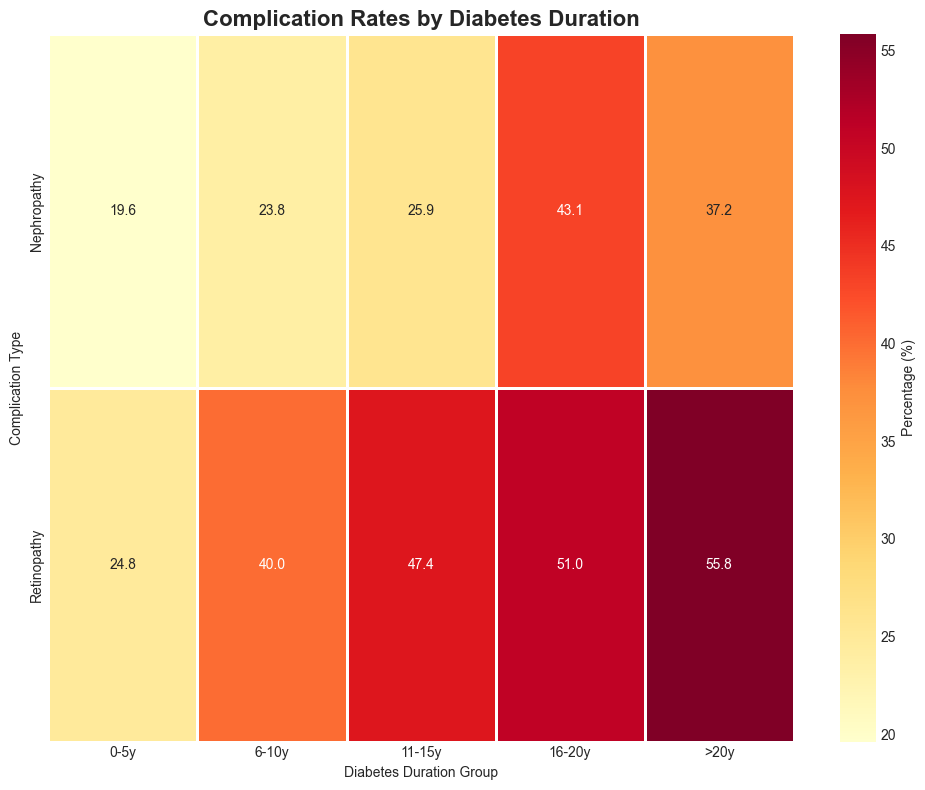

In [35]:
dn_df['duration_group'] = pd.cut(dn_df['Diabetes duration (y)'],
                                  bins=[0, 5, 10, 15, 20, 100],
                                  labels=['0-5y', '6-10y', '11-15y', '16-20y', '>20y'])

complications_by_duration = []
for group in ['0-5y', '6-10y', '11-15y', '16-20y', '>20y']:
    group_data = dn_df[dn_df['duration_group'] == group]
    if len(group_data) > 0:
        complications_by_duration.append({
            'Duration': group,
            'Nephropathy': group_data['Diabetic nephropathy (DN)'].mean() * 100,
            'Retinopathy': group_data['Diabetic retinopathy (DR)'].mean() * 100,
            'Count': len(group_data)
        })

comp_duration_df = pd.DataFrame(complications_by_duration)
pivot_comp_duration = comp_duration_df.set_index('Duration')[['Nephropathy', 'Retinopathy']]

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_comp_duration.T, 
            annot=True, 
            fmt='.1f',
            cmap='YlOrRd',
            cbar_kws={'label': 'Percentage (%)'},
            linewidths=1)

plt.title('Complication Rates by Diabetes Duration', fontsize=16, fontweight='bold')
plt.xlabel('Diabetes Duration Group')
plt.ylabel('Complication Type')
plt.tight_layout()
plt.show()

### 2.2 Bubble Plots for Diabetic Nephropathy Dataset

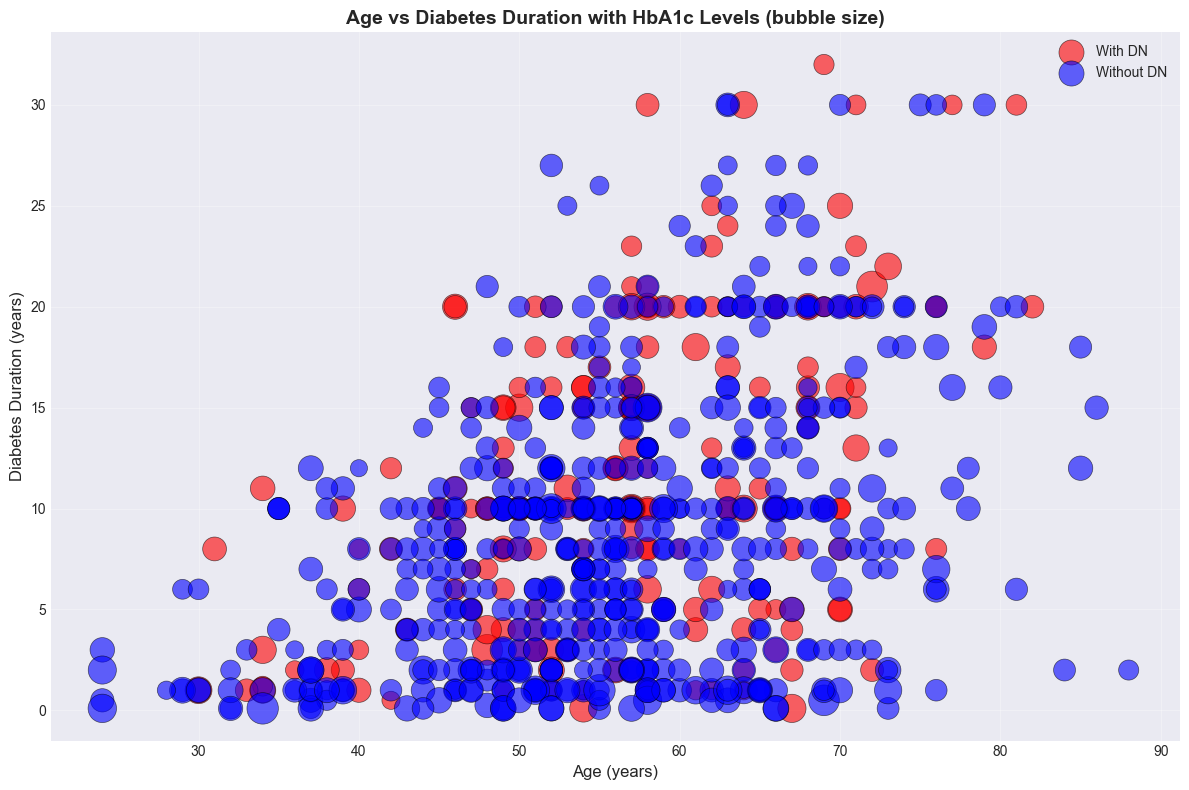

In [36]:
fig, ax = plt.subplots(figsize=(12, 8))

bubble_data = dn_df[['Age', 'Diabetes duration (y)', 'HbA1c (%)', 
                     'Diabetic nephropathy (DN)']].dropna()

dn_yes = bubble_data[bubble_data['Diabetic nephropathy (DN)'] == 1]
dn_no = bubble_data[bubble_data['Diabetic nephropathy (DN)'] == 0]

scatter1 = ax.scatter(dn_yes['Age'], 
                     dn_yes['Diabetes duration (y)'],
                     s=dn_yes['HbA1c (%)'] * 30,
                     alpha=0.6,
                     c='red',
                     edgecolors='black',
                     linewidth=0.5,
                     label='With DN')

scatter2 = ax.scatter(dn_no['Age'], 
                     dn_no['Diabetes duration (y)'],
                     s=dn_no['HbA1c (%)'] * 30,
                     alpha=0.6,
                     c='blue',
                     edgecolors='black',
                     linewidth=0.5,
                     label='Without DN')

ax.set_xlabel('Age (years)', fontsize=12)
ax.set_ylabel('Diabetes Duration (years)', fontsize=12)
ax.set_title('Age vs Diabetes Duration with HbA1c Levels (bubble size)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2.3 Principal Component Analysis (PCA) for Diabetic Nephropathy Dataset

In [37]:
dn_pca_features = ['Age', 'Diabetes duration (y)', 'BMI (kg/m2)', 'SBP (mmHg)',
                   'DBP (mmHg)', 'HbA1c (%)', 'FBG (mmol/L)']

dn_pca_data = dn_df[dn_pca_features + ['Diabetic nephropathy (DN)']].dropna()

X_dn = dn_pca_data[dn_pca_features]
y_dn = dn_pca_data['Diabetic nephropathy (DN)']

scaler_dn = StandardScaler()
X_dn_scaled = scaler_dn.fit_transform(X_dn)

pca_dn = PCA()
X_dn_pca = pca_dn.fit_transform(X_dn_scaled)

print("Explained variance ratio by component:")
for i, var in enumerate(pca_dn.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")

cumsum_var_dn = np.cumsum(pca_dn.explained_variance_ratio_)
print(f"\nCumulative variance explained by first 3 components: {cumsum_var_dn[2]:.4f} ({cumsum_var_dn[2]*100:.2f}%)")

Explained variance ratio by component:
PC1: 0.2383 (23.83%)
PC2: 0.1880 (18.80%)
PC3: 0.1646 (16.46%)
PC4: 0.1457 (14.57%)
PC5: 0.1066 (10.66%)
PC6: 0.0895 (8.95%)
PC7: 0.0674 (6.74%)

Cumulative variance explained by first 3 components: 0.5909 (59.09%)


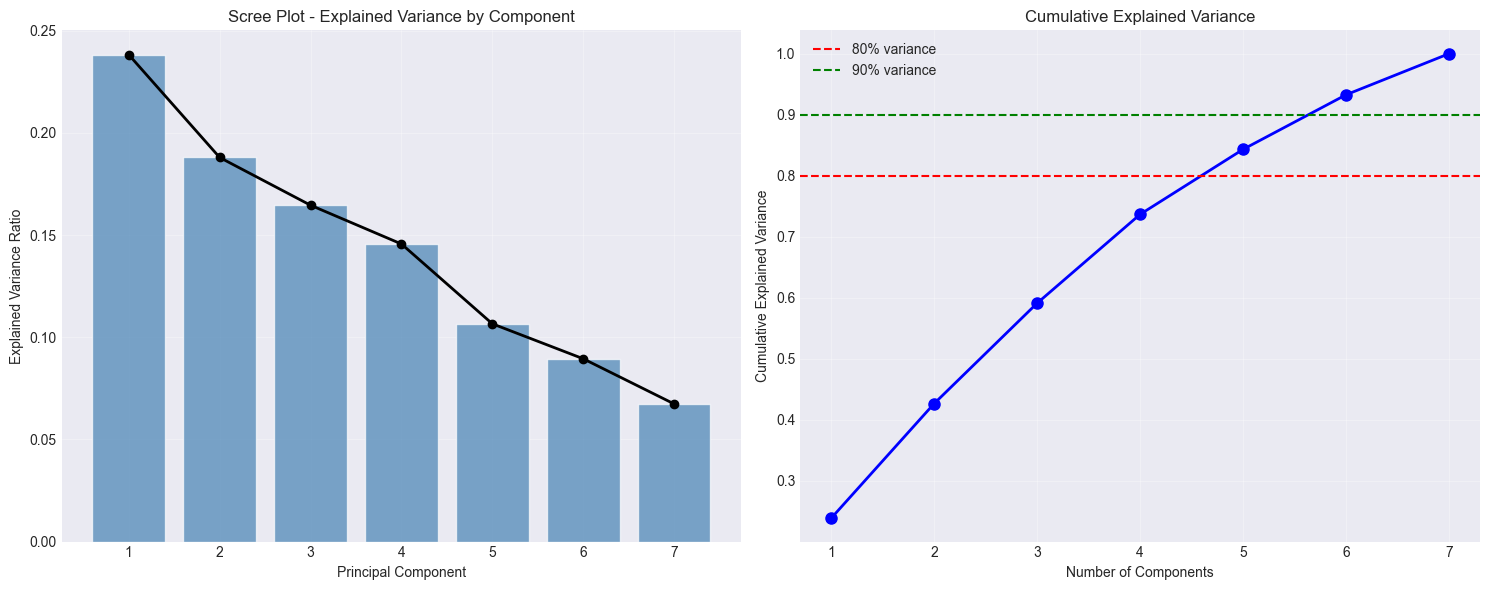

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.bar(range(1, len(pca_dn.explained_variance_ratio_) + 1), 
        pca_dn.explained_variance_ratio_,
        alpha=0.7,
        color='steelblue')
ax1.plot(range(1, len(pca_dn.explained_variance_ratio_) + 1), 
         pca_dn.explained_variance_ratio_,
         'ko-',
         linewidth=2)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Scree Plot - Explained Variance by Component')
ax1.set_xticks(range(1, len(pca_dn.explained_variance_ratio_) + 1))
ax1.grid(True, alpha=0.3)

ax2.plot(range(1, len(cumsum_var_dn) + 1), 
         cumsum_var_dn,
         'bo-',
         linewidth=2,
         markersize=8)
ax2.axhline(y=0.8, color='r', linestyle='--', label='80% variance')
ax2.axhline(y=0.9, color='g', linestyle='--', label='90% variance')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance')
ax2.set_xticks(range(1, len(cumsum_var_dn) + 1))
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2.4 Linear Regression Analysis for Diabetic Nephropathy Dataset

In [39]:
basic_dn_features = ['Age', 'Diabetes duration (y)', 'BMI (kg/m2)']
target_dn = 'Diabetic nephropathy (DN)'

model1_dn_data = dn_df[basic_dn_features + [target_dn]].dropna()
X1_dn = model1_dn_data[basic_dn_features]
y1_dn = model1_dn_data[target_dn]

X1_dn_train, X1_dn_test, y1_dn_train, y1_dn_test = train_test_split(X1_dn, y1_dn, test_size=0.3, random_state=42)

model1_dn = LinearRegression()
model1_dn.fit(X1_dn_train, y1_dn_train)

y1_dn_pred_train = model1_dn.predict(X1_dn_train)
y1_dn_pred_test = model1_dn.predict(X1_dn_test)

r2_train1_dn = r2_score(y1_dn_train, y1_dn_pred_train)
r2_test1_dn = r2_score(y1_dn_test, y1_dn_pred_test)
mse_test1_dn = mean_squared_error(y1_dn_test, y1_dn_pred_test)

print("Model 1: Predicting DN from Demographics")
print(f"Features: {basic_dn_features}")
print(f"R² (train): {r2_train1_dn:.4f}")
print(f"R² (test): {r2_test1_dn:.4f}")
print(f"MSE (test): {mse_test1_dn:.4f}")
print(f"Correlation (test): {np.corrcoef(y1_dn_test, y1_dn_pred_test)[0,1]:.4f}")

Model 1: Predicting DN from Demographics
Features: ['Age', 'Diabetes duration (y)', 'BMI (kg/m2)']
R² (train): 0.0694
R² (test): -0.0697
MSE (test): 0.1970
Correlation (test): 0.0133


In [40]:
glycemic_features = ['HbA1c (%)', 'FBG (mmol/L)', 'SBP (mmHg)']

model2_dn_data = dn_df[glycemic_features + [target_dn]].dropna()
X2_dn = model2_dn_data[glycemic_features]
y2_dn = model2_dn_data[target_dn]

X2_dn_train, X2_dn_test, y2_dn_train, y2_dn_test = train_test_split(X2_dn, y2_dn, test_size=0.3, random_state=42)

model2_dn = LinearRegression()
model2_dn.fit(X2_dn_train, y2_dn_train)

y2_dn_pred_train = model2_dn.predict(X2_dn_train)
y2_dn_pred_test = model2_dn.predict(X2_dn_test)

r2_train2_dn = r2_score(y2_dn_train, y2_dn_pred_train)
r2_test2_dn = r2_score(y2_dn_test, y2_dn_pred_test)
mse_test2_dn = mean_squared_error(y2_dn_test, y2_dn_pred_test)

print("\nModel 2: Predicting DN from Glycemic Control")
print(f"Features: {glycemic_features}")
print(f"R² (train): {r2_train2_dn:.4f}")
print(f"R² (test): {r2_test2_dn:.4f}")
print(f"MSE (test): {mse_test2_dn:.4f}")
print(f"Correlation (test): {np.corrcoef(y2_dn_test, y2_dn_pred_test)[0,1]:.4f}")


Model 2: Predicting DN from Glycemic Control
Features: ['HbA1c (%)', 'FBG (mmol/L)', 'SBP (mmHg)']
R² (train): 0.0502
R² (test): 0.0541
MSE (test): 0.1747
Correlation (test): 0.2396


In [43]:
X_dn_pca_df = pd.DataFrame(X_dn_pca[:, :3], columns=['PC1', 'PC2', 'PC3'])

X3_dn_train, X3_dn_test, y3_dn_train, y3_dn_test = train_test_split(X_dn_pca_df, y_dn, test_size=0.3, random_state=42)

model3_dn = LinearRegression()
model3_dn.fit(X3_dn_train, y3_dn_train)

y3_dn_pred_train = model3_dn.predict(X3_dn_train)
y3_dn_pred_test = model3_dn.predict(X3_dn_test)

r2_train3_dn = r2_score(y3_dn_train, y3_dn_pred_train)
r2_test3_dn = r2_score(y3_dn_test, y3_dn_pred_test)
mse_test3_dn = mean_squared_error(y3_dn_test, y3_dn_pred_test)

print("\nModel 3: Predicting DN from PCA Components")
print(f"Features: First 3 principal components")
print(f"R² (train): {r2_train3_dn:.4f}")
print(f"R² (test): {r2_test3_dn:.4f}")
print(f"MSE (test): {mse_test3_dn:.4f}")
print(f"Correlation (test): {np.corrcoef(y3_dn_test, y3_dn_pred_test)[0,1]:.4f}")


Model 3: Predicting DN from PCA Components
Features: First 3 principal components
R² (train): 0.0809
R² (test): 0.0203
MSE (test): 0.1874
Correlation (test): 0.1728


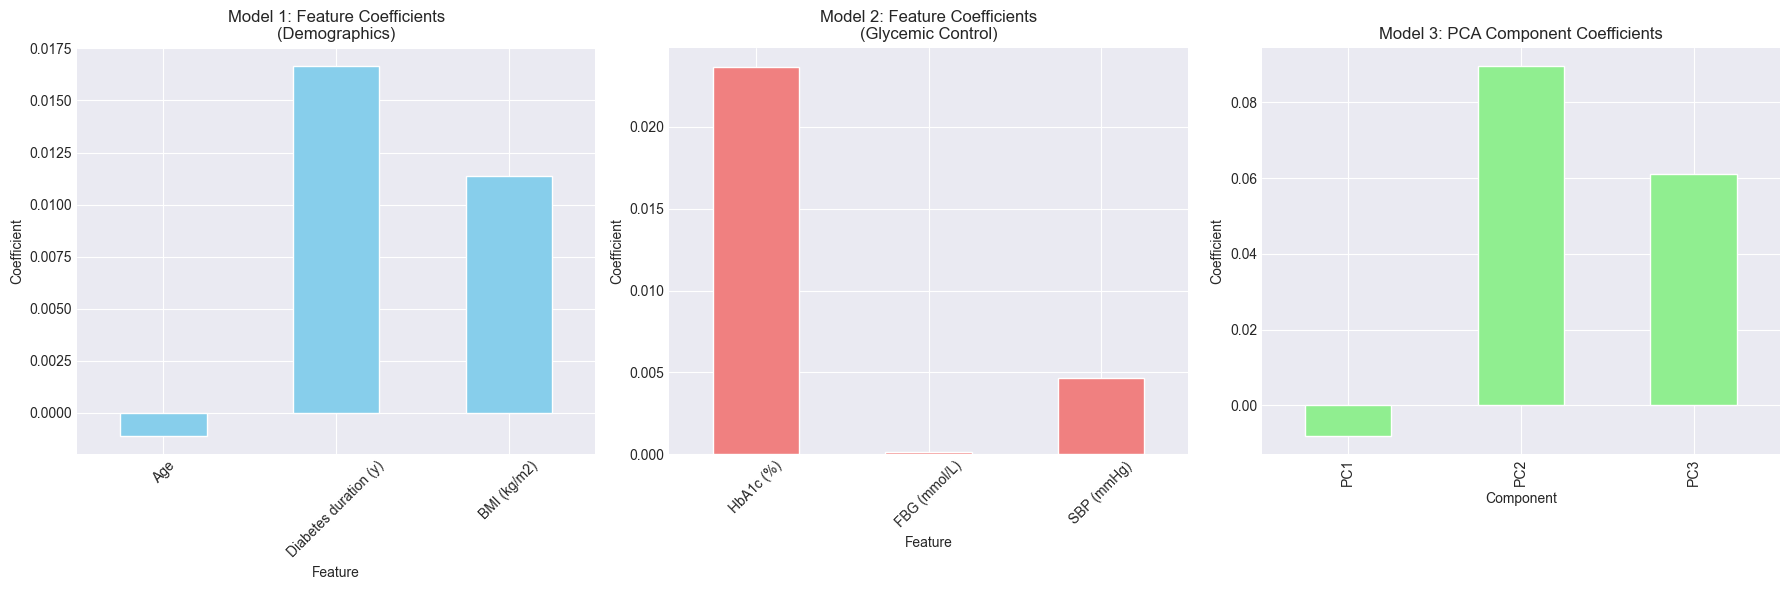


Linear Regression Model Comparison Summary - Diabetic Nephropathy
Model                          R² (test)       Best Features
------------------------------------------------------------
Model 1 (Demographics)         -0.0697         Age, Duration, BMI
Model 2 (Glycemic)             0.0541          HbA1c, FBG, SBP
Model 3 (PCA)                  0.0203          PC1, PC2, PC3


In [44]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

ax1 = axes[0]
coef1_dn = pd.Series(model1_dn.coef_, index=basic_dn_features)
coef1_dn.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Model 1: Feature Coefficients\n(Demographics)')
ax1.set_xlabel('Feature')
ax1.set_ylabel('Coefficient')
ax1.tick_params(axis='x', rotation=45)

ax2 = axes[1]
coef2_dn = pd.Series(model2_dn.coef_, index=glycemic_features)
coef2_dn.plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Model 2: Feature Coefficients\n(Glycemic Control)')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Coefficient')
ax2.tick_params(axis='x', rotation=45)

ax3 = axes[2]
coef3_dn = pd.Series(model3_dn.coef_, index=['PC1', 'PC2', 'PC3'])
coef3_dn.plot(kind='bar', ax=ax3, color='lightgreen')
ax3.set_title('Model 3: PCA Component Coefficients')
ax3.set_xlabel('Component')
ax3.set_ylabel('Coefficient')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Linear Regression Model Comparison Summary - Diabetic Nephropathy")
print("="*60)
print(f"{'Model':<30} {'R² (test)':<15} {'Best Features'}")
print("-"*60)
print(f"{'Model 1 (Demographics)':<30} {r2_test1_dn:<15.4f} Age, Duration, BMI")
print(f"{'Model 2 (Glycemic)':<30} {r2_test2_dn:<15.4f} HbA1c, FBG, SBP")
print(f"{'Model 3 (PCA)':<30} {r2_test3_dn:<15.4f} PC1, PC2, PC3")
print("="*60)

## Part 3: Acute Kidney Injury (AKI) Analysis

### 3.1 Heatmaps for AKI Dataset

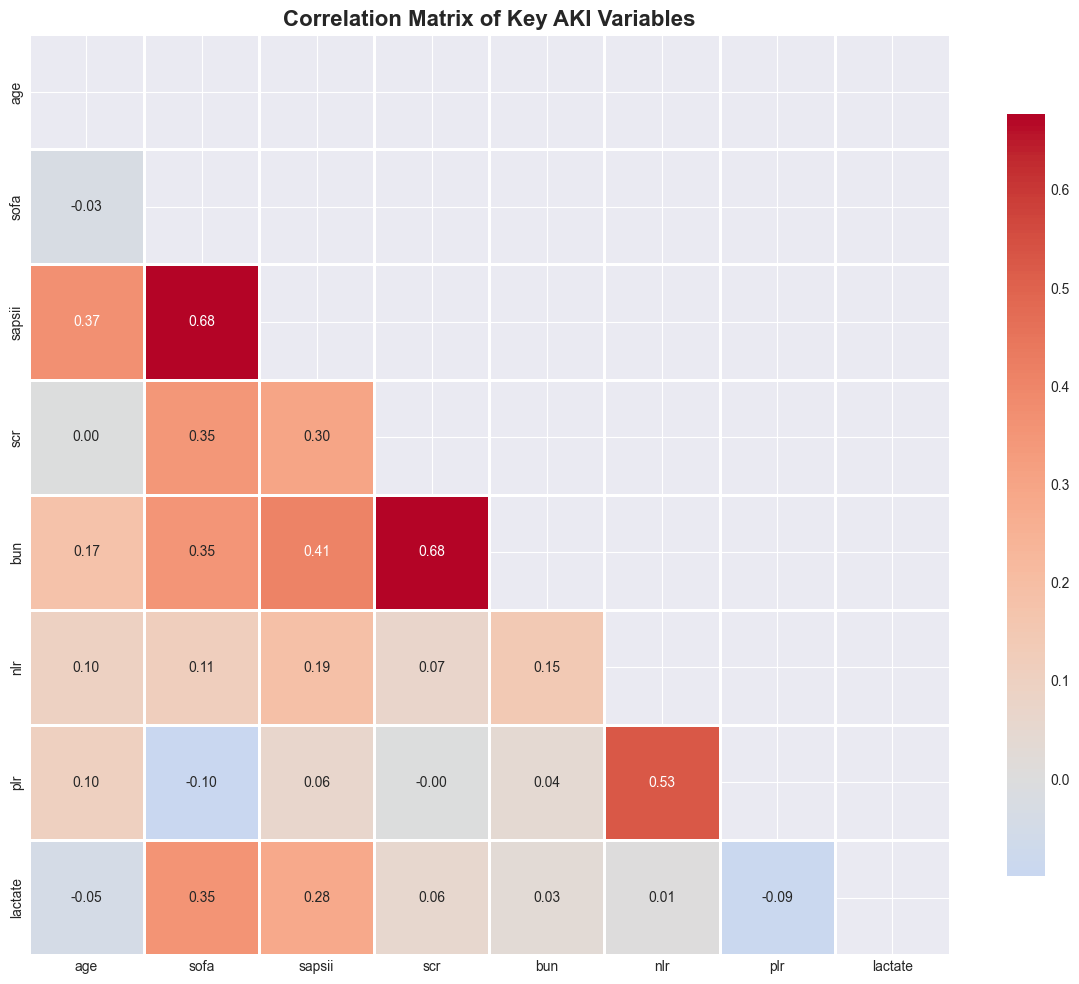

In [45]:
key_aki_vars = ['age', 'sofa', 'sapsii', 'scr', 'bun', 'nlr', 'plr', 'lactate']

existing_aki_vars = [col for col in key_aki_vars if col in aki_df.columns]

plt.figure(figsize=(12, 10))
correlation_matrix_aki = aki_df[existing_aki_vars].corr()

mask = np.triu(np.ones_like(correlation_matrix_aki, dtype=bool))

sns.heatmap(correlation_matrix_aki, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": .8})

plt.title('Correlation Matrix of Key AKI Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

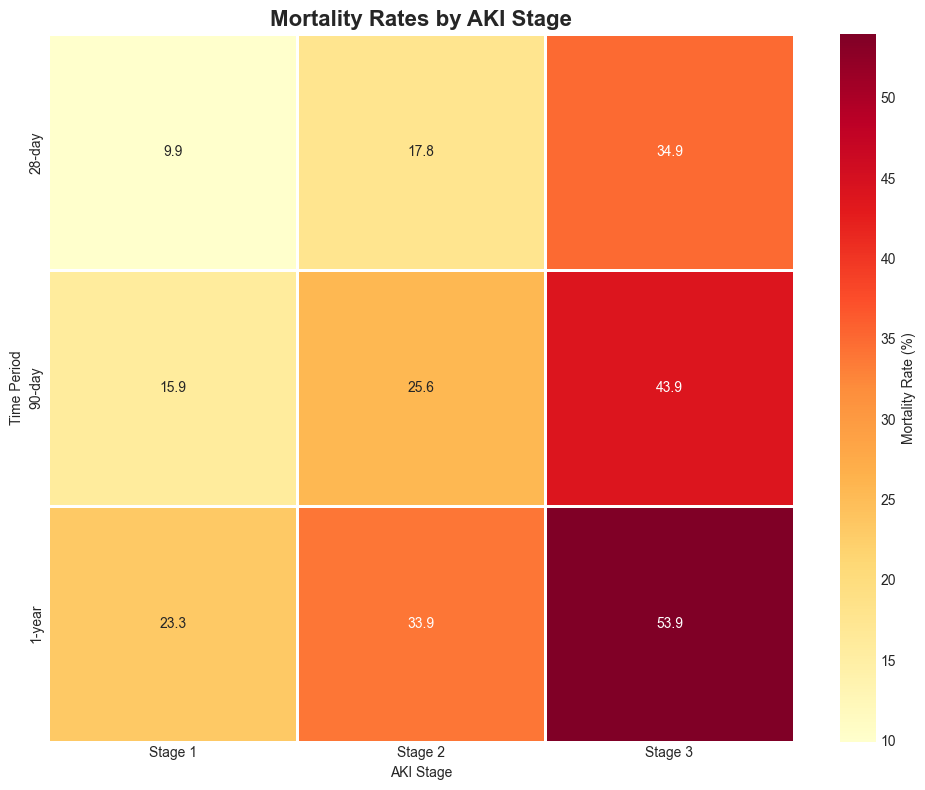

In [46]:
mortality_by_stage = []
for stage in [1, 2, 3]:
    stage_data = aki_df[aki_df['aki_stage'] == stage]
    if len(stage_data) > 0:
        mortality_by_stage.append({
            'Stage': f'Stage {stage}',
            '28-day': stage_data['mort_28_day'].mean() * 100,
            '90-day': stage_data['mort_90_day'].mean() * 100,
            '1-year': stage_data['mort_1_year'].mean() * 100,
            'Count': len(stage_data)
        })

mortality_df = pd.DataFrame(mortality_by_stage)
pivot_mortality = mortality_df.set_index('Stage')[['28-day', '90-day', '1-year']]

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_mortality.T, 
            annot=True, 
            fmt='.1f',
            cmap='YlOrRd',
            cbar_kws={'label': 'Mortality Rate (%)'},
            linewidths=1)

plt.title('Mortality Rates by AKI Stage', fontsize=16, fontweight='bold')
plt.xlabel('AKI Stage')
plt.ylabel('Time Period')
plt.tight_layout()
plt.show()

### 3.2 Bubble Plots for AKI Dataset

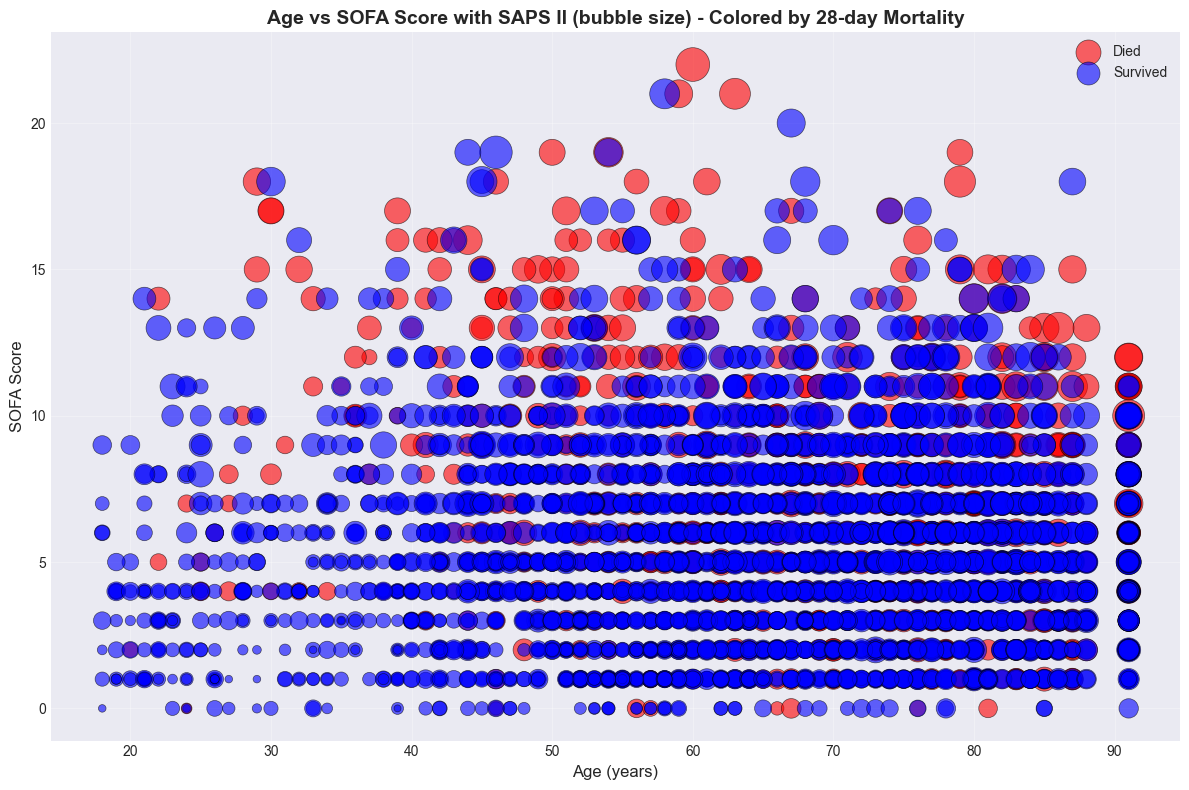

In [47]:
fig, ax = plt.subplots(figsize=(12, 8))

bubble_data = aki_df[['age', 'sofa', 'sapsii', 'mort_28_day']].dropna()

died = bubble_data[bubble_data['mort_28_day'] == 1]
survived = bubble_data[bubble_data['mort_28_day'] == 0]

scatter1 = ax.scatter(died['age'], 
                     died['sofa'],
                     s=died['sapsii'] * 5,
                     alpha=0.6,
                     c='red',
                     edgecolors='black',
                     linewidth=0.5,
                     label='Died')

scatter2 = ax.scatter(survived['age'], 
                     survived['sofa'],
                     s=survived['sapsii'] * 5,
                     alpha=0.6,
                     c='blue',
                     edgecolors='black',
                     linewidth=0.5,
                     label='Survived')

ax.set_xlabel('Age (years)', fontsize=12)
ax.set_ylabel('SOFA Score', fontsize=12)
ax.set_title('Age vs SOFA Score with SAPS II (bubble size) - Colored by 28-day Mortality', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.3 Principal Component Analysis (PCA) for AKI Dataset

In [48]:
aki_pca_features = ['age', 'sofa', 'sapsii', 'scr', 'bun', 'nlr', 'plr', 'hb']

aki_pca_data = aki_df[aki_pca_features + ['mort_28_day']].dropna()

X_aki = aki_pca_data[aki_pca_features]
y_aki = aki_pca_data['mort_28_day']

scaler_aki = StandardScaler()
X_aki_scaled = scaler_aki.fit_transform(X_aki)

pca_aki = PCA()
X_aki_pca = pca_aki.fit_transform(X_aki_scaled)

print("Explained variance ratio by component:")
for i, var in enumerate(pca_aki.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")

cumsum_var_aki = np.cumsum(pca_aki.explained_variance_ratio_)
print(f"\nCumulative variance explained by first 3 components: {cumsum_var_aki[2]:.4f} ({cumsum_var_aki[2]*100:.2f}%)")

Explained variance ratio by component:
PC1: 0.3171 (31.71%)
PC2: 0.1921 (19.21%)
PC3: 0.1396 (13.96%)
PC4: 0.1262 (12.62%)
PC5: 0.1061 (10.61%)
PC6: 0.0560 (5.60%)
PC7: 0.0372 (3.72%)
PC8: 0.0257 (2.57%)

Cumulative variance explained by first 3 components: 0.6488 (64.88%)


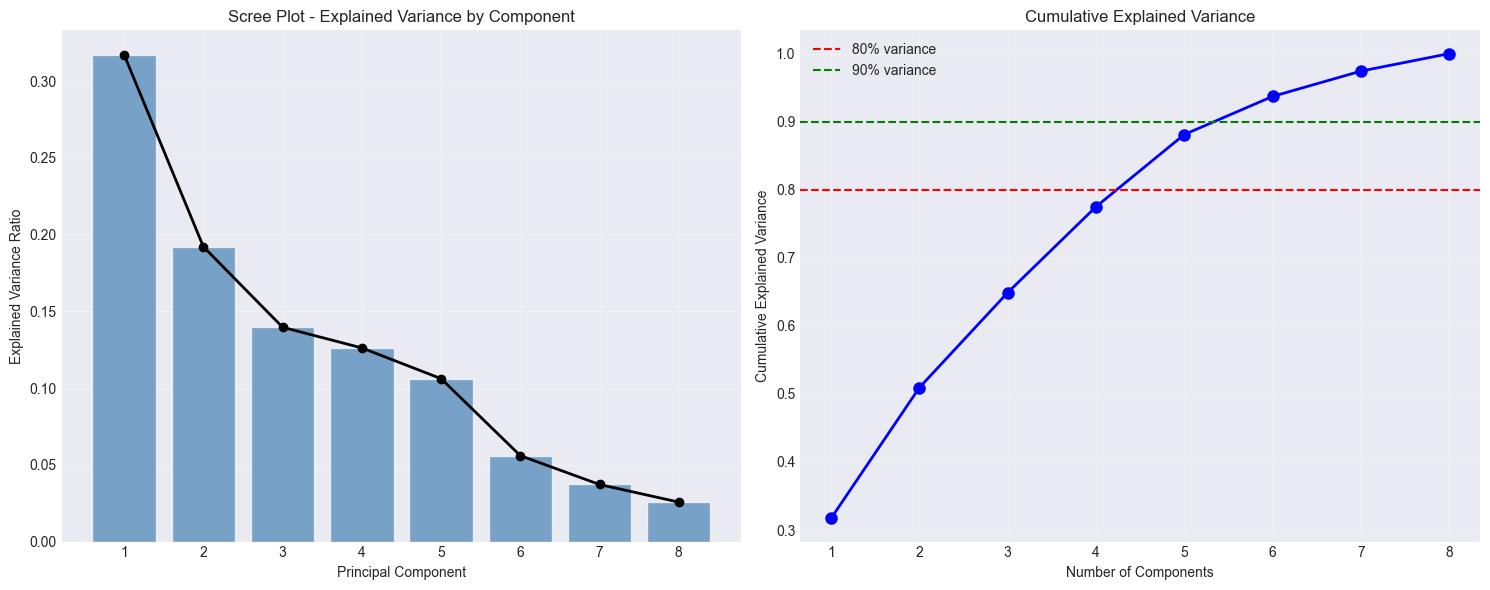

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.bar(range(1, len(pca_aki.explained_variance_ratio_) + 1), 
        pca_aki.explained_variance_ratio_,
        alpha=0.7,
        color='steelblue')
ax1.plot(range(1, len(pca_aki.explained_variance_ratio_) + 1), 
         pca_aki.explained_variance_ratio_,
         'ko-',
         linewidth=2)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Scree Plot - Explained Variance by Component')
ax1.set_xticks(range(1, len(pca_aki.explained_variance_ratio_) + 1))
ax1.grid(True, alpha=0.3)

ax2.plot(range(1, len(cumsum_var_aki) + 1), 
         cumsum_var_aki,
         'bo-',
         linewidth=2,
         markersize=8)
ax2.axhline(y=0.8, color='r', linestyle='--', label='80% variance')
ax2.axhline(y=0.9, color='g', linestyle='--', label='90% variance')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance')
ax2.set_xticks(range(1, len(cumsum_var_aki) + 1))
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### 3.4.4 Linear Regression - Acute Kidney Injury

Linear Regression Results - Predicting SOFA Score:
R² Score: 0.5872
Mean Squared Error: 5.3300
Root Mean Squared Error: 2.3087
Correlation coefficient: 0.7680

Feature Importance (by absolute coefficient value):
ph: -2.3301
scr: 0.3360
lactate: 0.2092
sapsii: 0.1606
hb: -0.0983
age: -0.0534
nlr: 0.0213
plr: -0.0023
bun: 0.0022


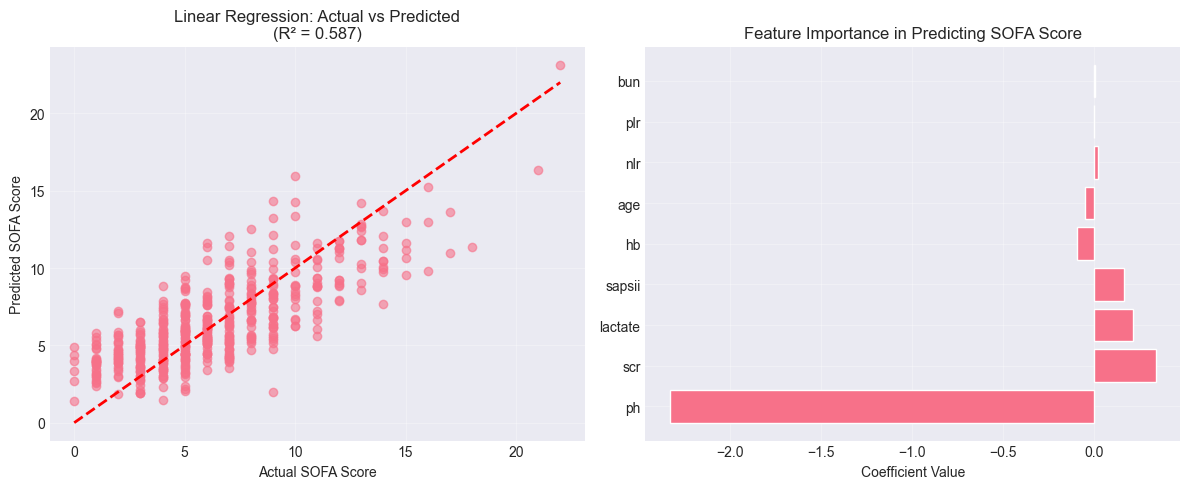

In [50]:
lr_features_aki = ['age', 'sapsii', 'scr', 'bun', 'nlr', 'plr', 'hb', 'lactate', 'ph']
target_aki = 'sofa'

lr_data_aki = aki_df[lr_features_aki + [target_aki]].dropna()

X_lr_aki = lr_data_aki[lr_features_aki]
y_lr_aki = lr_data_aki[target_aki]

X_train_aki, X_test_aki, y_train_aki, y_test_aki = train_test_split(
    X_lr_aki, y_lr_aki, test_size=0.2, random_state=42
)

lr_model_aki = LinearRegression()
lr_model_aki.fit(X_train_aki, y_train_aki)

y_pred_aki = lr_model_aki.predict(X_test_aki)

r2_aki = r2_score(y_test_aki, y_pred_aki)
mse_aki = mean_squared_error(y_test_aki, y_pred_aki)
rmse_aki = np.sqrt(mse_aki)

print("Linear Regression Results - Predicting SOFA Score:")
print(f"R² Score: {r2_aki:.4f}")
print(f"Mean Squared Error: {mse_aki:.4f}")
print(f"Root Mean Squared Error: {rmse_aki:.4f}")
print(f"Correlation coefficient: {np.corrcoef(y_test_aki, y_pred_aki)[0,1]:.4f}")

feature_importance_aki = pd.DataFrame({
    'Feature': lr_features_aki,
    'Coefficient': lr_model_aki.coef_,
    'Abs_Coefficient': np.abs(lr_model_aki.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("\nFeature Importance (by absolute coefficient value):")
for _, row in feature_importance_aki.iterrows():
    print(f"{row['Feature']}: {row['Coefficient']:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test_aki, y_pred_aki, alpha=0.6)
plt.plot([y_test_aki.min(), y_test_aki.max()], 
         [y_test_aki.min(), y_test_aki.max()], 'r--', lw=2)
plt.xlabel('Actual SOFA Score')
plt.ylabel('Predicted SOFA Score')
plt.title(f'Linear Regression: Actual vs Predicted\n(R² = {r2_aki:.3f})')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.barh(feature_importance_aki['Feature'], feature_importance_aki['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Predicting SOFA Score')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [51]:
lr_features_bun = ['age', 'sofa', 'sapsii', 'scr', 'nlr', 'plr', 'hb']
target_bun = 'bun'

lr_data_bun = aki_df[lr_features_bun + [target_bun]].dropna()

X_lr_bun = lr_data_bun[lr_features_bun]
y_lr_bun = lr_data_bun[target_bun]

X_train_bun, X_test_bun, y_train_bun, y_test_bun = train_test_split(
    X_lr_bun, y_lr_bun, test_size=0.2, random_state=42
)

lr_model_bun = LinearRegression()
lr_model_bun.fit(X_train_bun, y_train_bun)

y_pred_bun = lr_model_bun.predict(X_test_bun)

r2_bun = r2_score(y_test_bun, y_pred_bun)
mse_bun = mean_squared_error(y_test_bun, y_pred_bun)
rmse_bun = np.sqrt(mse_bun)

print("\nAlternative Linear Regression - Predicting BUN Levels:")
print(f"R² Score: {r2_bun:.4f}")
print(f"Mean Squared Error: {mse_bun:.4f}")
print(f"Root Mean Squared Error: {rmse_bun:.4f}")

try:
    print("\n=== Model Comparison ===")
    print(f"SOFA Score Prediction R²: {r2_aki:.4f}")
    print(f"BUN Level Prediction R²: {r2_bun:.4f}")
    print(f"\nSOFA model explains {r2_aki*100:.1f}% of the variance")
    print(f"BUN model explains {r2_bun*100:.1f}% of the variance")
except NameError:
    print("\nNote: Run the previous cell first to see model comparison")


Alternative Linear Regression - Predicting BUN Levels:
R² Score: 0.5618
Mean Squared Error: 268.4041
Root Mean Squared Error: 16.3830

=== Model Comparison ===
SOFA Score Prediction R²: 0.5872
BUN Level Prediction R²: 0.5618

SOFA model explains 58.7% of the variance
BUN model explains 56.2% of the variance


## 4. Conclusions

**Heatmap Analysis**

For the CKD dataset, there were strong positive correlations between blood urea and serum creatinine at 0.87. This shows that these two variables move together as kidney function worsens. The correlation matrix also showed that there were negative correlations between hemoglobin and kidney function markers. For example, hemoglobin vs blood urea was -0.47. Hemoglobin vs serum creatinine was -0.36.

For the Diabetic Nephropathy dataset, there were weak correlations between diabetes duration and HbA1c at 0.08. Systolic and diastolic blood pressure showed a moderate correlation at 0.54.

Finally, for the AKI dataset, there were strong correlations between severity scores and inflammatory markers. For example, SOFA and SAPS II had 0.74. NLR and NPR had 0.60. Kidney function markers also showed moderate correlation with serum creatinine and BUN at 0.52 as an example.

**Bubble Plots**

For CKD, the bubble plots showed relationships between age, kidney function markers and hemoglobin levels. There was clear separation between CKD and non-CKD patients. CKD patients usually had lower GFR values across the different ages.

The Diabetic Nephropathy dataset showed that patients with diabetic nephropathy had diabetes for longer and their HbA1c levels varied. There was an overlap between those with and without DN.

The AKI dataset showed that patients who died within 28 days had higher SOFA scores and SAPS II values. Age was an indicator of mortality risk.

**Principal Component Analysis**

For the CKD dataset, PC1 captured 37.25% of hte variance and was dominated by kidney function markers. However, if we represented the data only using PC1 it would not be enough. We would need to use PC1, PC2 and PC3 as they capture 70.84% of the variance.

For the Diabetic Nephropathy dataset, PC1 captures only 23.83% of the variance. The first three components together capture 59.09% of the variance. This shows that the data is spread across multiple factors and doesn't have a dominant pattern.

The AKI dataset captures 31.71% of the variance. The first three components capture 64.88% of the variance. PC1 is mostly taken up by severity scores, but also has some kidney function markers and inflammatory markers.

**Linear Regression**

The CKD dataset showed moderate performance for GFR with r^2 of 0.3739. Serum creatinine had a positive coefficient of 6.7190 and hemoglobin at 6.5094. Blood urea had a negative coefficient of -0.4374. The r^2 of 0.5294 on training data vs 0.3739 on test data points to possible overfitting.

The Diabetic Nephropathy dataset showed weak relationships. For example, model 1 which was based on demographics only got R62 = -0.0697. Model 2 which was based on glycemic control showed a minor improvement with an r^2 of 0.0541. Finally the PCA model got an r^2 of 0.0203.

The AKI dataset showed fairly successful scores with SOFA r^2 = 0.5872. Age had the largest negative coefficient at -1.1685. BUN prediction got an r^2 of 0.5618. Serum creatinine had the highest r^2 at 0.6160.

**Summary**

The data is largely expected for kidney disease patterns. The CKD dataset showed predictable patterns. It had strong correlations with blood urea and serum creatinine at 0.87. However, there was a lower r^2 for GFR which points towards non-linear relationships that were not captured.

The Diabetic Nephropathy dataset had poor R^2 values. This shows that the data might be influenced by variables not captured. We might also need to do non-linear modeling.

The AKI dataset shows the most promise for predictive modeling. There were higher r^2 values ranging from 0.56–0.59 for SOFA and BUN. This shows that illness markers are easily measurable.

There were some outliers. In the CKD dataset, there were extreme values in serum creatinine and blood urea. For Diabetic Nephropathy, it was pretty clean. For AKI there was variability in severity scores and biomarkers.

If we were, to only use the first two PCA components, it would capture 57.05%, 42.63% and 50.92% for CDK, DN, and AKI respectively. Therefore, it would be hard to represent a majority of the data using only the first two components for the datasets.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

### Figure 5.13

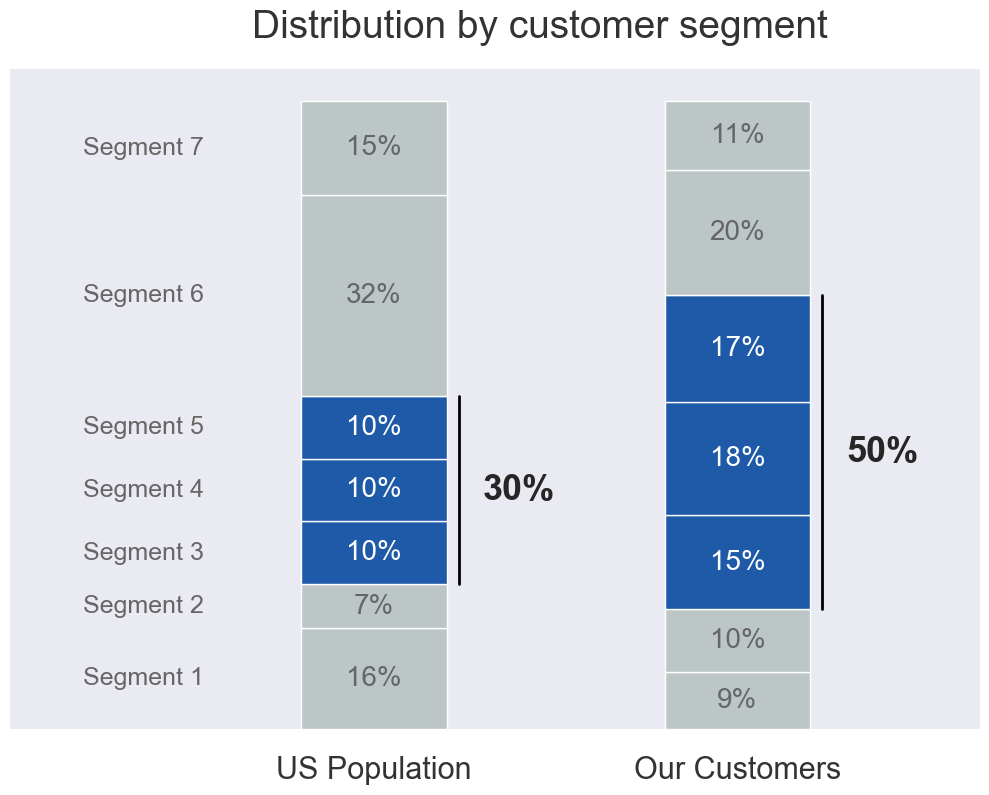

In [58]:
import matplotlib.pyplot as plt
import numpy as np

segments = ['Segment 1', 'Segment 2', 'Segment 3', 'Segment 4', 'Segment 5', 'Segment 6', 'Segment 7']
us_pop = [16, 7, 10, 10, 10, 32, 15]
our_cust = [9, 10, 15, 18, 17, 20, 11]

fig, ax = plt.subplots(figsize=(10, 8))

blue = '#1e5aa8'
gray = '#bcc6c7'
colors = [gray, gray, blue, blue, blue, gray, gray]

def create_stacked_bar(x_pos, values, colors):
    bottom = 0
    for i, (val, color) in enumerate(zip(values, colors)):
        ax.bar(x_pos, val, 0.6, bottom=bottom, color=color, edgecolor='white', linewidth=1)
        text_color = 'white' if color == blue else '#666666'
        ax.text(x_pos, bottom + val/2, f'{val}%', ha='center', va='center', fontsize=20, color=text_color)
        bottom += val

def add_group_annotation(x_pos, values, start_idx, end_idx, label):
    y_start = sum(values[:start_idx])
    height = sum(values[start_idx:end_idx+1])
    ax.text(x_pos + 0.45, y_start + height/2, label, ha='left', va='center', fontsize=26, fontweight='bold')
    ax.plot([x_pos + 0.35, x_pos + 0.35], [y_start, y_start + height], 'k-', linewidth=2)

create_stacked_bar(0.5, us_pop, colors)
create_stacked_bar(2.0, our_cust, colors)

add_group_annotation(0.5, us_pop, 2, 4, '30%')
add_group_annotation(2.0, our_cust, 2, 4, '50%')

cumsum = np.insert(np.cumsum(us_pop), 0, 0)
y_positions = (cumsum[:-1] + cumsum[1:]) / 2
for i, segment in enumerate(segments):
    ax.text(-0.2, y_positions[i], segment, ha='right', va='center', fontsize=18, color='#666666')

ax.text(0.5, -8, 'US Population', ha='center', fontsize=22, color='#333333')
ax.text(2.0, -8, 'Our Customers', ha='center', fontsize=22, color='#333333')
ax.text(0, 110, 'Distribution by customer segment', fontsize=28, color='#333333')

ax.set_xlim(-1, 3)
ax.set_ylim(0, 105)
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()